In [1]:
import sys
import numpy as np
sys.path.append("/home/jmdeloui/STL_dev")

from STL_main.STL2DKernel import STL2DKernel as STLDataClass

DC=STLDataClass(np.random.randn(128,128))

In [2]:
wop=DC.get_wavelet_op()
w=wop.kernel[0]

-3.2265856653168614e-18 -1.1555579666323415e-35 0.9999999999999999
-2.7408630920433553e-18 7.28583859910259e-19 1.0
-2.1163626406917046e-18 -1.3866695599588098e-34 1.0
-6.938893903907229e-19 9.665395667211291e-20 1.0


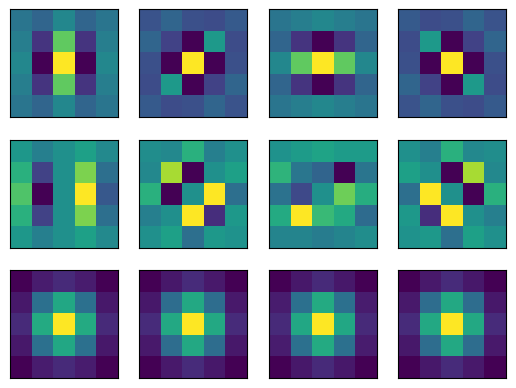

In [3]:
import matplotlib.pyplot as plt

for i in range(4):
    print(np.mean(w[i].cpu().numpy().real),np.mean(w[i].cpu().numpy().imag),np.sum(abs(w[i].cpu().numpy())))
    plt.subplot(3,4,1+i)
    plt.imshow(w[i].cpu().numpy().real)
    plt.xticks([])
    plt.yticks([])
    plt.subplot(3,4,5+i)
    plt.imshow(w[i].cpu().numpy().imag)
    plt.xticks([])
    plt.yticks([])
    plt.subplot(3,4,9+i)
    plt.imshow(abs(w[i].cpu().numpy()))
    plt.xticks([])
    plt.yticks([])

In [4]:
r=wop.apply(DC,0).array

-3.2265856653168614e-18 -1.1555579666323415e-35 0.9999999999999999
-2.7408630920433553e-18 7.28583859910259e-19 1.0
-2.1163626406917046e-18 -1.3866695599588098e-34 1.0
-6.938893903907229e-19 9.665395667211291e-20 1.0


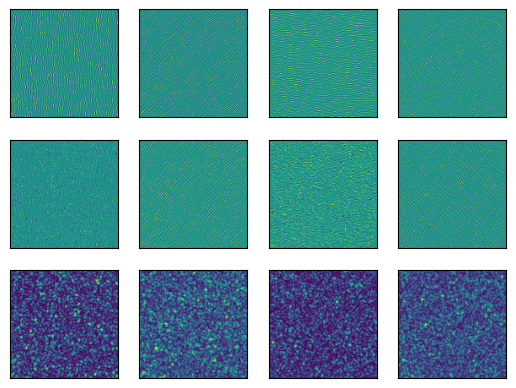

In [5]:
for i in range(4):
    print(np.mean(w[i].cpu().numpy().real),np.mean(w[i].cpu().numpy().imag),np.sum(abs(w[i].cpu().numpy())))
    plt.subplot(3,4,1+i)
    plt.imshow(r[i].cpu().numpy().real)
    plt.xticks([])
    plt.yticks([])
    plt.subplot(3,4,5+i)
    plt.imshow(r[i].cpu().numpy().imag)
    plt.xticks([])
    plt.yticks([])
    plt.subplot(3,4,9+i)
    plt.imshow(abs(r[i].cpu().numpy()))
    plt.xticks([])
    plt.yticks([])

-3.2265856653168614e-18 -1.1555579666323415e-35 0.9999999999999999
-2.7408630920433553e-18 7.28583859910259e-19 1.0
-2.1163626406917046e-18 -1.3866695599588098e-34 1.0
-6.938893903907229e-19 9.665395667211291e-20 1.0


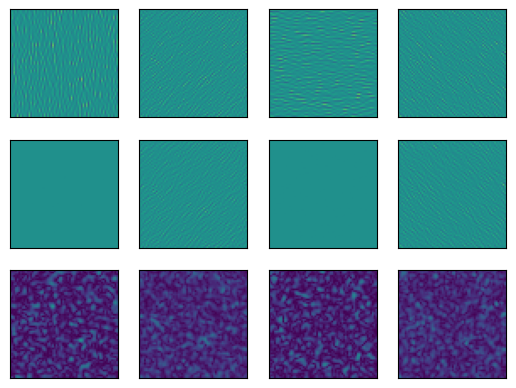

In [6]:
LDC=DC.downsample(1,copy=True)
r=wop.apply(LDC,1).array
amp=1
for i in range(4):
    print(np.mean(w[i].cpu().numpy().real),np.mean(w[i].cpu().numpy().imag),np.sum(abs(w[i].cpu().numpy())))
    plt.subplot(3,4,1+i)
    plt.imshow(r[i].cpu().numpy().real,vmin=-amp,vmax=amp)
    plt.xticks([])
    plt.yticks([])
    plt.subplot(3,4,5+i)
    plt.imshow(r[i].cpu().numpy().imag,vmin=-amp,vmax=amp)
    plt.xticks([])
    plt.yticks([])
    plt.subplot(3,4,9+i)
    plt.imshow(abs(r[i].cpu().numpy()),vmin=0,vmax=amp)
    plt.xticks([])
    plt.yticks([])

torch.Size([10, 64, 64])
torch.Size([10, 32, 32])
torch.Size([10, 16, 16])
torch.Size([10, 8, 8])
torch.Size([10, 4, 4])


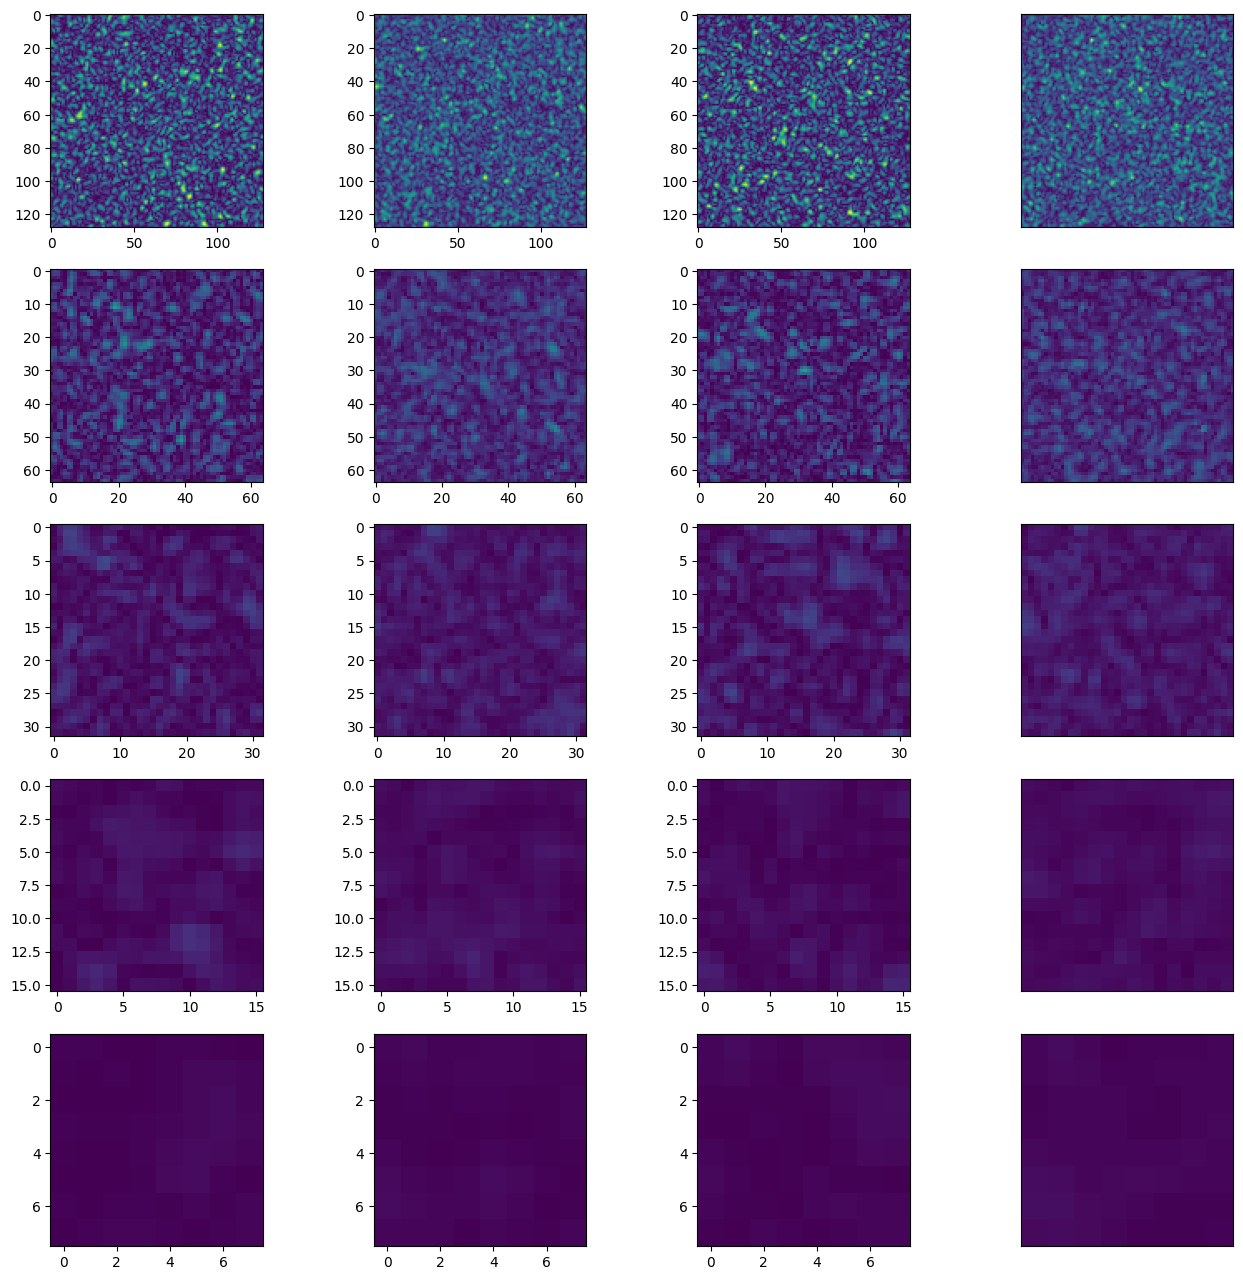

In [9]:
LDC=STLDataClass(np.random.randn(10,128,128))
plt.figure(figsize=(16,16))
for k in range(5):
    r=wop.apply(LDC,k).array[0]
    for i in range(4):
        plt.subplot(5,4,1+4*k+i)
        plt.imshow(abs(r[i].cpu().numpy()),vmin=0,vmax=amp)
    plt.xticks([])
    plt.yticks([])
    
    LDC=LDC.downsample(k+1,copy=True)
    print(LDC.array.shape)